In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn import metrics
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
exercise_df = pd.read_csv("exercise.csv")
calorie_df = pd.read_csv("calories.csv")

In [5]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
calorie_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
calorie_df.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [8]:
exercise_df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [9]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [10]:
calorie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [11]:
df = pd.merge(exercise_df, calorie_df, on="User_ID")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<AxesSubplot:xlabel='Heart_Rate', ylabel='Count'>

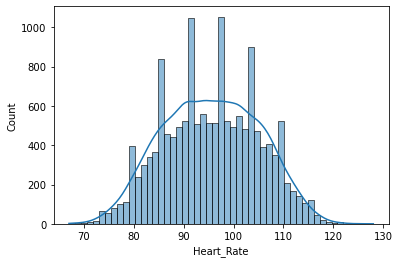

In [12]:
sns.histplot(data = df, x = "Heart_Rate", kde = True)


<AxesSubplot:xlabel='Age', ylabel='Density'>

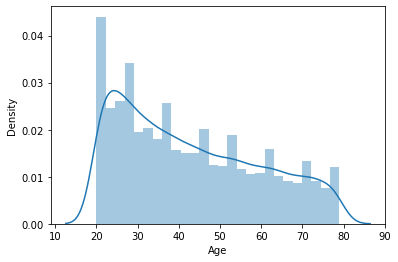

In [13]:
sns.distplot(df["Age"])

In [14]:
df.replace({"Gender":{'female':1,'male':0}},inplace=True)

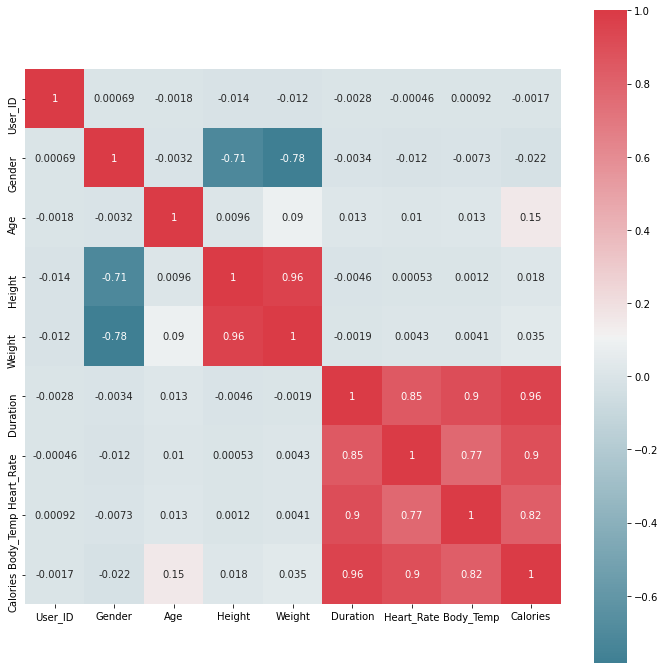

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(
        df.corr(),
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, annot=True)
plt.show()

# Model building 

In [16]:
X = df.drop(['User_ID','Calories'],axis=1)
y = df['Calories']

In [17]:
X_train,X_test,y_train, y_test = split(X,y, test_size=0.2, random_state=5)

In [18]:
X_train = X_train.values
X_test = X_test.values

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
y_pred = model.predict(X_test)

In [21]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

8.195721400000002


In [22]:
test_accuracy = metrics.r2_score(y_test,y_pred)
print("test accuracy",test_accuracy)

test accuracy 0.9978585004775724


# Predictive system 

In [23]:
import pickle

In [24]:
filename = "trained_model.sav"
pickle.dump(model, open (filename, 'wb'))
# wb means write binary
# rb means read binary

In [25]:
# loading saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [26]:
input_data = (1,21,150,45,20,95,39)
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction[0])

98.82
